## **K-nearest Neighbor: Part I**


#### **Importing packages**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random
import sklearn.cluster 
from sklearn.metrics import precision_recall_fscore_support
import sklearn.model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from statistics import mean
from itertools import combinations


#### Reading CSV File

In [ ]:
# Comma-separated values
data = pd.read_csv('cleveland.csv')

In [ ]:
# Rename 'num' column to 'disease' and change 1,2,3,4 to 1
data = data.rename({'num':'disease'}, axis=1)
data['disease'] = data.disease.apply(lambda x: min(x, 1))
display(data.head(5))

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
# # Comma-separated values
# testing = pd.read_csv('cleveland.csv')

# testing['num'] = testing.num.apply(lambda x: min(x, 1))
# testing['num'].unique()

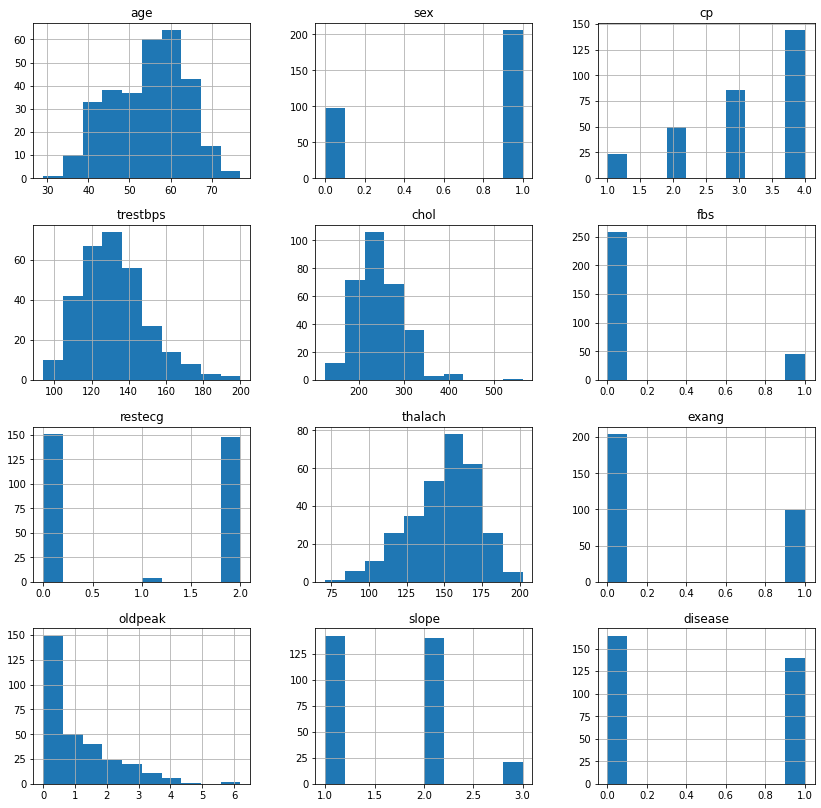

In [ ]:
data.hist(figsize=(14,14))
plt.show()

In [ ]:
# data['disease'].unique()
df = data.copy()

In [ ]:
# import seaborn as sns

# corr_matrix = data.corr()
# top_correlation = corr_matrix.index
# plt.figure(figsize=(20,20))
# #plotting heat map
# sns.heatmap(data[top_correlation].corr(),annot=True,cmap='RdYlGn')
# plt.show()

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


#### Standardizing the data


We are choosing four variables:

* **Variable 1:**
cp: chest pain type

-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

* **Variable 2:**
age

* **Variable 3:**
trestbps 

* **Variable 4:**
chol: serum cholestoral in mg/dl 


#### Standardizing the data

In [ ]:
df[['cp', 'age', 'trestbps', 'chol']].values

# standardize the data
df['cp_s'] = (df.cp-df.cp.mean())/df.cp.std()
df['age_s'] = (df.age-df.age.mean())/df.age.std()
df['trestbps_s'] = (df.trestbps-df.trestbps.mean())/df.trestbps.std()
df['chol_s'] = (df.chol-df.chol.mean())/df.chol.std()

In [ ]:
df['cp_s'].unique()

array([-2.24805569,  0.87653547, -0.16499491, -1.2065253 ])

In [ ]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease,cp_s,age_s,trestbps_s,chol_s
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,-2.248056,0.947160,0.756274,-0.264463
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,0.876535,1.389703,1.608559,0.759159
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0.876535,1.389703,-0.664201,-0.341717
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,-0.164995,-1.929372,-0.096011,0.063869
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,-1.206525,-1.486829,-0.096011,-0.824558


When k is 10: 
**This code simply looks for the 10 patients with ages and attributes closest to a given attributes, then prints how many of those patients are healthy and how many have heart disease.**

Testing it on 1 patient.

In [ ]:
nn = NearestNeighbors(n_neighbors=10, metric='euclidean', algorithm='auto')

X = df[['age_s','cp_s', 'trestbps_s', 'chol_s']].values
fit = nn.fit(X)

patient = df.sample(1)
patientX = patient[['age_s','cp_s', 'trestbps_s', 'chol_s']].values[0]
patienty = patient[['disease']].values[0]
display(patient)

# Find the k nearest neighbors
distances, indices = fit.kneighbors([patientX])
nbrs = df.iloc[indices[0]]
display(nbrs)

healthy = len(nbrs[nbrs.disease==0])
sick = len(nbrs[nbrs.disease==1])
print(f'healthy: {healthy}, sick: {sick}')
predict = 0 if healthy > sick else 1
actual = patienty

success = predict == actual
success

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease,cp_s,age_s,trestbps_s,chol_s
48,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0,-0.164995,1.168431,0.472179,3.289244


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease,cp_s,age_s,trestbps_s,chol_s
48,65.0,0.0,3.0,140.0,417.0,1.0,2.0,157.0,0.0,0.8,1.0,1.0,3.0,0,-0.164995,1.168431,0.472179,3.289244
173,62.0,0.0,4.0,140.0,394.0,0.0,2.0,157.0,0.0,1.2,2.0,0.0,3.0,0,0.876535,0.836524,0.472179,2.845031
121,63.0,0.0,4.0,150.0,407.0,0.0,2.0,154.0,0.0,4.0,2.0,3.0,7.0,1,0.876535,0.947160,1.040369,3.096108
181,56.0,0.0,4.0,134.0,409.0,0.0,2.0,150.0,1.0,1.9,2.0,2.0,7.0,1,0.876535,0.172709,0.131265,3.134735
75,65.0,0.0,3.0,160.0,360.0,0.0,2.0,151.0,0.0,0.8,1.0,0.0,3.0,0,-0.164995,1.168431,1.608559,2.188368
32,64.0,1.0,3.0,140.0,335.0,0.0,0.0,158.0,0.0,0.0,1.0,0.0,3.0,1,-0.164995,1.057795,0.472179,1.705527
38,55.0,1.0,4.0,132.0,353.0,0.0,0.0,132.0,1.0,1.2,2.0,1.0,7.0,1,0.876535,0.062073,0.017627,2.053172
203,64.0,0.0,3.0,140.0,313.0,0.0,0.0,133.0,0.0,0.2,1.0,0.0,7.0,0,-0.164995,1.057795,0.472179,1.280627
26,58.0,0.0,3.0,120.0,340.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0,3.0,0,-0.164995,0.393980,-0.664201,1.802095
118,63.0,1.0,4.0,130.0,330.0,1.0,2.0,132.0,1.0,1.8,1.0,3.0,7.0,1,0.876535,0.947160,-0.096011,1.608959


healthy: 5, sick: 5


array([False])

**Testing on a 100 patients sample.**

In [ ]:
# Use knn on age. First create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=10, metric='euclidean', algorithm='auto')

X = df[['age_s','cp_s', 'trestbps_s', 'chol_s']].values
fit = nn.fit(X)

n = 100
patients = df.sample(n)
patientsX = patients[['age_s','cp_s', 'trestbps_s', 'chol_s']].values
patientsy = patients[['disease']].values
# display(patients)

# Find the k nearest neighbors
distances, indices = fit.kneighbors(patientsX)

# Iterate over the patients
y_pred = []
for i in range(n):
  nbrs = df.iloc[indices[i]]
  # display(nbrs)

  healthy = len(nbrs[nbrs.disease==0])
  sick = len(nbrs[nbrs.disease==1])
  # print(f'healthy: {healthy}, sick: {sick}')
  predict = 0 if healthy > sick else 1
  y_pred.append(predict)
  # actual = patienty
  # success = predict == actual
  # success
  # display(success)

# print(y_pred)
# print(patientsy)

# precision = tp/(tp+fp) ("messiness")
# recall = tp/(tp+fn)
# support - how many samples are positive
(p,r,f,s) = precision_recall_fscore_support(patientsy, y_pred, labels=[1])
print(f'precision={p}, recall={r}, f-score={f}, support={s}')

precision=[0.7173913], recall=[0.76744186], f-score=[0.74157303], support=[43]


#### **Optimal K**
Finding the optimal value of k

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease,cp_s,age_s,trestbps_s,chol_s
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,-2.248056,0.947160,0.756274,-0.264463
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,0.876535,1.389703,1.608559,0.759159
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,0.876535,1.389703,-0.664201,-0.341717
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,-0.164995,-1.929372,-0.096011,0.063869
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,-1.206525,-1.486829,-0.096011,-0.824558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,-2.248056,-1.044285,-1.232391,0.334260
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1,0.876535,1.500339,0.699455,-1.037008
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1,0.876535,0.283345,-0.096011,-2.234453
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,-1.206525,0.283345,-0.096011,-0.206522


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def get_scores(k, attrbs, y_attrb, df):
  # Use knn on age. First create a nearest neighbors object.
  nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

  # This builds an index data structure under the hood for query performance
  X = df[attrbs].values
  fit = nn.fit(X)

  # Get random patients to test on
  n = 100
  patients = df.sample(n)
  patientsX = patients[attrbs].values
  patientsy = patients[y_attrb].values
  # display(patients)

  # Find the k nearest neighbors to the patient.
  distances, indices = fit.kneighbors(patientsX)
  # print('indices of k-nearest neighbors for each patient:')
  # display(indices)

  y_pred = []
  for i in range(n):
      # print('nearest neighbors to patient: {}:'.format(patientsX[i]))
      nbrs = df.iloc[indices[i]]
      # Drop the patient of interest
      nbrs = nbrs.drop(patients.index[i], errors='ignore')
      # display(nbrs)

      healthy = nbrs[nbrs.disease == 0].count().disease
      sick = nbrs[nbrs.disease == 1].count().disease
      predict = 0 if (healthy > sick) else 1
      # print(f'healthy: {healthy}, sick: {sick}, predicted: {predict}, actual: {patientsy[i][0]}')
      y_pred.append(predict)

  # This is where we would compile how many patients are predicted
  # correctly. Remember:
  #    precision = tp/(tp+fp)  ("sloppiness")
  #    recall    = tp/(tp+fn)  ("What percentage did we find?")
  #    f-score - a balance between precision and recall
  #    support - number of positive labels
  return precision_recall_fscore_support(patientsy, y_pred, labels=[1])

### **Determining the Optimal K**

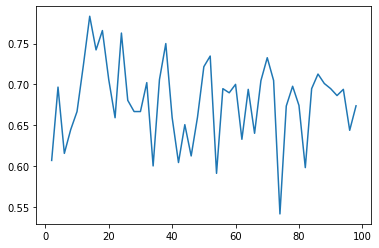

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['age_s','cp_s', 'trestbps_s', 'chol_s']
y_attrb = ['disease']
scores = [get_scores(k, attrbs, y_attrb, df) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

#### **Determining the optimal k value based on the best F score**




In [ ]:
best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
print(f'Score :{best_score}, k: {k}')

Score :0.7835051546391752, k: 14


In [ ]:
len(scores[2])

49

#### **Separation of training and test dataset**

In [ ]:
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

X = df[['age_s','cp_s', 'trestbps_s', 'chol_s']].values
y = df[['disease']].values 

# Use random_state if you want the same values each time you run for debugging,
# but you should select the split randomly when you're ready to actually train
# and test on the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

fit = nn.fit(X_train)

patientsX = X_test
patientsy = y_test
# display(patients)

# Find the k nearest neighbors
distances, indices = fit.kneighbors(patientsX)

# Iterate over the patients
y_pred = []
for i in range(len(patientsX)):
  nbrs = df.iloc[indices[i]]
  # display(nbrs)

  healthy = len(nbrs[nbrs.disease==0])
  sick = len(nbrs[nbrs.disease==1])
  # print(f'healthy: {healthy}, sick: {sick}')
  predict = 0 if healthy > sick else 1
  y_pred.append(predict)
  # actual = patienty
  # success = predict == actual
  # success
  # display(success)

# print(y_pred)
# print(patientsy)

# precision = tp/(tp+fp) ("messiness")
# recall = tp/(tp+fn)
# support - how many samples are positive
(p,r,f,s) = precision_recall_fscore_support(patientsy, y_pred, labels=[1])
print(f'precision={p}, recall={r}, f-score={f}, support={s}')

# Build the model with the training data and test with the test data

# You may also want to use this function to compute the f score. The labels parameter indicates
# that label 1 is "positive" in the sense of "true positive", "false positive" etc.
# (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[1])

precision=[0.34482759], recall=[0.33333333], f-score=[0.33898305], support=[30]


In [ ]:
k

14

## Monte Carlo Approach

In [ ]:
def monte_carlo_knn(X, y, k):
  nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

  fit = nn.fit(X_train)

  patientsX = X_test
  patientsy = y_test
  # display(patients)

  # Find the k nearest neighbors
  distances, indices = fit.kneighbors(patientsX)

  # Iterate over the patients
  y_pred = []
  for i in range(len(patientsX)):
    nbrs = df.iloc[indices[i]]
    # display(nbrs)

    healthy = len(nbrs[nbrs.disease==0])
    sick = len(nbrs[nbrs.disease==1])
    # print(f'healthy: {healthy}, sick: {sick}')
    predict = 0 if healthy > sick else 1
    y_pred.append(predict)
    # actual = patienty
    # success = predict == actual
    # success
    # display(success)

  # print(y_pred)
  # print(patientsy)

  # precision = tp/(tp+fp) ("messiness")
  # recall = tp/(tp+fn)
  # support - how many samples are positive
  (p,r,f,s) = precision_recall_fscore_support(patientsy, y_pred, labels=[1], zero_division = 0)
  print(f'precision={p}, recall={r}, f-score={f}, support={s}')
  return (p,r,f,s) 
# Build the model with the training data and test with the test data

# You may also want to use this function to compute the f score. The labels parameter indicates
# that label 1 is "positive" in the sense of "true positive", "false positive" etc.
# (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[1])

#### **Report all precision/recall/F1 scores as well as the mean F1 score** 

**Our initial model**

In [ ]:
# k = 72
X = df[['age_s','cp_s', 'trestbps_s', 'chol_s']].values
y = df[['disease']].values 

scorelist = list()
fscores = []
for i in range(10):
  (p,r,f,s) = monte_carlo_knn(X, y, k)
  scorelist.append((p,r,f,s))
  fscores.append(f[0])

# print(fscores)
print(f'The mean is {mean(fscores)}')

precision=[0.5], recall=[0.5], f-score=[0.5], support=[38]
precision=[0.48571429], recall=[0.43589744], f-score=[0.45945946], support=[39]
precision=[0.4375], recall=[0.46666667], f-score=[0.4516129], support=[30]
precision=[0.27027027], recall=[0.3125], f-score=[0.28985507], support=[32]
precision=[0.57692308], recall=[0.42857143], f-score=[0.49180328], support=[35]
precision=[0.5862069], recall=[0.47222222], f-score=[0.52307692], support=[36]
precision=[0.41935484], recall=[0.40625], f-score=[0.41269841], support=[32]
precision=[0.31578947], recall=[0.42857143], f-score=[0.36363636], support=[28]
precision=[0.4516129], recall=[0.5], f-score=[0.47457627], support=[28]
precision=[0.51612903], recall=[0.44444444], f-score=[0.47761194], support=[36]
The mean is 0.44443306247342057


In [ ]:
k

14

## Testing different lists of attributes

**Variable optimization: Try 2 (Adding in fbs_s)**

In [ ]:
# standardize the data for more variables to be used later on

df['fbs_s'] = (df.fbs-df.fbs.mean())/df.fbs.std()
df['restecg_s'] = (df.restecg-df.restecg.mean())/df.restecg.std()
df['exang_s'] = (df.exang-df.exang.mean())/df.exang.std()

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['age_s','cp_s','fbs_s', 'trestbps_s', 'chol_s']
y_attrb = ['disease']
scores = [get_scores(k, attrbs, y_attrb, df) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

Text(0, 0.5, 'F-score')

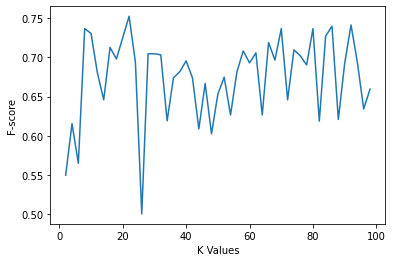

In [ ]:
plt.plot(kvals, scores[2])
plt.xlabel("K Values")
plt.ylabel("F-score")

In [ ]:
best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

#Displaying the best score and the k-value
print(f'Score :{best_score}, k: {k}')

scorelist1 = list()
fscores1 = []
X = df[['age_s', 'cp_s', 'fbs_s','trestbps_s', 'chol_s']].values
y = df[['disease']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn(X, y, k)
  scorelist1.append((p,r,f,s))
  fscores1.append(f[0]) #Is it the first one or the second f-score whose value we need to consider? 

print(f'The mean is {mean(fscores1)}')

Score :0.7526881720430106, k: 22
precision=[0.36], recall=[0.3], f-score=[0.32727273], support=[30]
precision=[0.42424242], recall=[0.36842105], f-score=[0.3943662], support=[38]
precision=[0.4137931], recall=[0.35294118], f-score=[0.38095238], support=[34]
precision=[0.48648649], recall=[0.52941176], f-score=[0.50704225], support=[34]
precision=[0.60714286], recall=[0.425], f-score=[0.5], support=[40]
precision=[0.33333333], recall=[0.22857143], f-score=[0.27118644], support=[35]
precision=[0.5], recall=[0.38095238], f-score=[0.43243243], support=[42]
precision=[0.3], recall=[0.16216216], f-score=[0.21052632], support=[37]
precision=[0.36363636], recall=[0.30769231], f-score=[0.33333333], support=[39]
precision=[0.5], recall=[0.25641026], f-score=[0.33898305], support=[39]
The mean is 0.3696095132009997


Adding in fbs_s hurt our f-score significantly (dropped f-score by .2)


**Variable optimization: Try 3 (Adding in restecg_s, exang_s, and fbs_s)**

Score :0.8089887640449439, k: 26
precision=[0.30769231], recall=[0.20512821], f-score=[0.24615385], support=[39]
precision=[0.56521739], recall=[0.36111111], f-score=[0.44067797], support=[36]
precision=[0.44444444], recall=[0.21621622], f-score=[0.29090909], support=[37]
precision=[0.31818182], recall=[0.22580645], f-score=[0.26415094], support=[31]
precision=[0.48], recall=[0.35294118], f-score=[0.40677966], support=[34]
precision=[0.5], recall=[0.40625], f-score=[0.44827586], support=[32]
precision=[0.48148148], recall=[0.33333333], f-score=[0.39393939], support=[39]
precision=[0.66666667], recall=[0.51428571], f-score=[0.58064516], support=[35]
precision=[0.5], recall=[0.21052632], f-score=[0.2962963], support=[38]
precision=[0.60869565], recall=[0.4375], f-score=[0.50909091], support=[32]
The mean is 0.3876919130263695


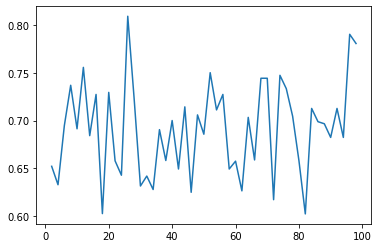

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['age_s','cp_s','fbs_s', 'trestbps_s', 'chol_s', 'restecg_s','exang_s']
y_attrb = ['disease']
scores = [get_scores(k, attrbs, y_attrb, df) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

#Displaying the best score and the k-value
print(f'Score :{best_score}, k: {k}')

scorelist2 = list()
fscores2 = []
X = df[['age_s', 'cp_s', 'fbs_s','trestbps_s', 'chol_s', 'restecg_s','exang_s']].values
y = df[['disease']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn(X, y, k)
  scorelist2.append((p,r,f,s))
  fscores2.append(f[0]) #Is it the first one or the second f-score whose value we need to consider? 

print(f'The mean is {mean(fscores2)}')

Adding in restecg_s and exang_s alongside our original chosen variables and fbs hurt our f-score even more! (another .1 drop)

**Variable optimization: Try 4 (Removing cp_s)**

Score :0.7142857142857143, k: 82
precision=[0.33333333], recall=[0.08823529], f-score=[0.13953488], support=[34]
precision=[0.6], recall=[0.08571429], f-score=[0.15], support=[35]
precision=[1.], recall=[0.02941176], f-score=[0.05714286], support=[34]
precision=[0.38461538], recall=[0.13888889], f-score=[0.20408163], support=[36]
precision=[0.52380952], recall=[0.30555556], f-score=[0.38596491], support=[36]
precision=[0.], recall=[0.], f-score=[0.], support=[40]
precision=[0.], recall=[0.], f-score=[0.], support=[33]
precision=[1.], recall=[0.13888889], f-score=[0.24390244], support=[36]
precision=[1.], recall=[0.02631579], f-score=[0.05128205], support=[38]
precision=[0.55555556], recall=[0.15625], f-score=[0.24390244], support=[32]
The mean is 0.14758112151283823


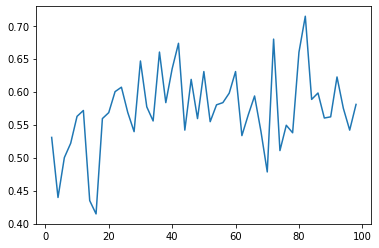

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['age_s', 'trestbps_s','chol_s']
y_attrb = ['disease']
scores = [get_scores(k, attrbs, y_attrb, df) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
print(f'Score :{best_score}, k: {k}')

scorelist3 = list()
fscores3 = []
X = df[['age_s', 'trestbps_s','chol_s']].values
y = df[['disease']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn(X, y, k)
  scorelist3.append((p,r,f,s))
  fscores3.append(f[0]) #Is it the first one or the second f-score whose value we need to consider? 

print(f'The mean is {mean(fscores3)}')

Removing fbs_s, restecg_s and exang_s helped our model improve over the two before it, cp_s proved quite predictive as our model has a reduced f-score over the initial model. (.14 drop)

**Variable optimization: Try 5 (removing chol_sd)**

Score :0.7912087912087912, k: 32
precision=[0.17857143], recall=[0.16666667], f-score=[0.17241379], support=[30]
precision=[0.34615385], recall=[0.23684211], f-score=[0.28125], support=[38]
precision=[0.42857143], recall=[0.26470588], f-score=[0.32727273], support=[34]
precision=[0.23529412], recall=[0.12121212], f-score=[0.16], support=[33]
precision=[0.30769231], recall=[0.11111111], f-score=[0.16326531], support=[36]
precision=[0.5], recall=[0.48148148], f-score=[0.49056604], support=[27]
precision=[0.11538462], recall=[0.11111111], f-score=[0.11320755], support=[27]
precision=[0.34375], recall=[0.40740741], f-score=[0.37288136], support=[27]
precision=[0.5], recall=[0.41176471], f-score=[0.4516129], support=[34]
precision=[0.33333333], recall=[0.22222222], f-score=[0.26666667], support=[27]
The mean is 0.2799136337228961


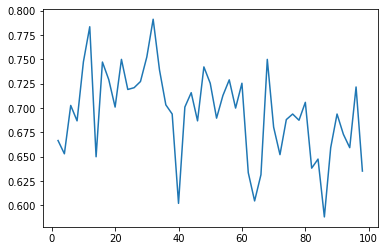

In [ ]:
df[['cp', 'age', 'trestbps', 'chol']].values

# standardize the data
df['cp_s'] = (df.cp-df.cp.mean())/df.cp.std()


kvals = range(2, 100, 2)
attrbs = ['age_s', 'trestbps_s', 'cp_s']
y_attrb = ['disease']
scores = [get_scores(k, attrbs, y_attrb, df) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
print(f'Score :{best_score}, k: {k}')

scorelist4 = list()
fscores4 = []
X = df[['age_s', 'trestbps_s','cp_s']].values
y = df[['disease']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn(X, y, k)
  scorelist4.append((p,r,f,s))
  fscores4.append(f[0]) #Is it the first one or the second f-score whose value we need to consider? 

print(f'The mean is {mean(fscores4)}')

Removing chol_s has a similiar effect as to removing cp_s

**Variable optimization: Try 6 (removing trestbps_s)**

In [ ]:

# kvals = range(2, 100, 2)
# attrbs = ['age_s', 'chol_s', 'cp_s']
# y_attrb = ['disease']
# scores = [get_scores(k, attrbs, y_attrb, df) for k in kvals]
# # print(scores)

# scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
# scores = list(zip(*scores))

# plt.plot(kvals, scores[2])

# best_score = 0
# i = 2
# k = 0

# for score in scores[2]:
#   if score > best_score:
#     best_score = score
#     k = i
#   i += 2

#   #Displaying the best score and the k-value
# # print(f'Score :{best_score}, k: {k}')

# scorelist5 = list()
# fscores5 = []
# X = df[['age_s', 'chol_s','cp_s']].values
# y = df[['disease']].values
# for i in range(10):
#   (p,r,f,s) = monte_carlo_knn(X, y, k)
#   scorelist5.append((p,r,f,s))
#   fscores5.append(f[0])

# print(f'The mean is {mean(fscores5)}')

Similiar effect as the previous two models

**Variable optimization: Try 7 (removing age_s)**

Score :0.8380952380952381, k: 42
precision=[0.1875], recall=[0.09090909], f-score=[0.12244898], support=[33]
precision=[0.60869565], recall=[0.37837838], f-score=[0.46666667], support=[37]
precision=[0.51851852], recall=[0.36842105], f-score=[0.43076923], support=[38]
precision=[0.6], recall=[0.3], f-score=[0.4], support=[30]
precision=[0.23076923], recall=[0.09090909], f-score=[0.13043478], support=[33]
precision=[0.], recall=[0.], f-score=[0.], support=[35]
precision=[0.58333333], recall=[0.35897436], f-score=[0.44444444], support=[39]
precision=[0.6], recall=[0.41666667], f-score=[0.49180328], support=[36]
precision=[0.35294118], recall=[0.15384615], f-score=[0.21428571], support=[39]
precision=[0.57142857], recall=[0.27906977], f-score=[0.375], support=[43]
The mean is 0.30758530970551134


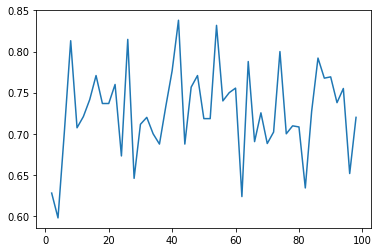

In [ ]:

kvals = range(2, 100, 2)
attrbs = ['trestbps_s', 'chol_s', 'cp_s']
y_attrb = ['disease']
scores = [get_scores(k, attrbs, y_attrb, df) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
print(f'Score :{best_score}, k: {k}')

scorelist6 = list()
fscores6 = []
X = df[['trestbps_s', 'chol_s','cp_s']].values
y = df[['disease']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn(X, y, k)
  scorelist6.append((p,r,f,s))
  fscores6.append(f[0]) #Is it the first one or the second f-score whose value we need to consider? 

print(f'The mean is {mean(fscores6)}')

Same effect as the previous 3 models. Given that removing any variable harms our f-score, and trying to add 3 different variables lowered our f-score dramatically, our optimal attributes are the ones we started with.

## Part 2: Breast Cancer Data

In [ ]:
df2 = pd.read_csv('breast-cancer-wisconsin.data')
df2.columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses','class']

In [ ]:
df2.drop(['id'],1, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
df2.replace('?', -99999, inplace= True)

In [ ]:
df2.head()

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [ ]:
# df2[['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses']].values

# standardize the data
df2['clump_thickness_s'] = (df2.clump_thickness-df2.clump_thickness.mean())/df2.clump_thickness.std()
df2['unif_cell_size_s'] = (df2.unif_cell_size-df2.unif_cell_size.mean())/df2.unif_cell_size.std()
df2['unif_cell_shape_s'] = (df2.unif_cell_shape-df2.unif_cell_shape.mean())/df2.unif_cell_shape.std()
df2['marg_adhesion_s'] = (df2.marg_adhesion-df2.marg_adhesion.mean())/df2.marg_adhesion.std()
df2['single_epith_cell_size_s'] = (df2.single_epith_cell_size-df2.single_epith_cell_size.mean())/df2.single_epith_cell_size.std()
# df2['bare_nuclei_s'] = (df2.bare_nuclei-df2.bare_nuclei.mean())/df2.bare_nuclei.std()
df2['bland_chrom_s'] = (df2.bland_chrom-df2.bland_chrom.mean())/df2.bland_chrom.std()
df2['norm_nucleoli_s'] = (df2.norm_nucleoli-df2.norm_nucleoli.mean())/df2.norm_nucleoli.std()
df2['mitoses_s'] = (df2.mitoses-df2.mitoses.mean())/df2.mitoses.std()



In [ ]:
def get_scores2(k, attrbs, y_attrb, df):
  # Use knn on age. First create a nearest neighbors object.
  nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

  # This builds an index data structure under the hood for query performance
  X = df[attrbs].values
  fit = nn.fit(X)

  # Get random patients to test on
  n = 100
  patients = df.sample(n)
  patientsX = patients[attrbs].values
  patientsy = patients[y_attrb].values
  # display(patients)

  # Find the k nearest neighbors to the patient.
  distances, indices = fit.kneighbors(patientsX)
  # print('indices of k-nearest neighbors for each patient:')
  # display(indices)

  y_pred = []
  for i in range(n):
      # print('nearest neighbors to patient: {}:'.format(patientsX[i]))
      nbrs = df.iloc[indices[i]]
      # Drop the patient of interest
      nbrs = nbrs.drop(patients.index[i], errors='ignore')
      # display(nbrs)

      healthy = nbrs[nbrs['class'] == 2].count()['class']
      sick = nbrs[nbrs['class'] == 4].count()['class']
      predict = 2 if (healthy > sick) else 4
      # print(f'healthy: {healthy}, sick: {sick}, predicted: {predict}, actual: {patientsy[i][0]}')
      y_pred.append(predict)

  # This is where we would compile how many patients are predicted
  # correctly. Remember:
  #    precision = tp/(tp+fp)  ("sloppiness")
  #    recall    = tp/(tp+fn)  ("What percentage did we find?")
  #    f-score - a balance between precision and recall
  #    support - number of positive labels
  # print(y_pred)
  return precision_recall_fscore_support(patientsy, y_pred, labels=[4], zero_division = 0)

In [ ]:
len(patientsy)

76

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


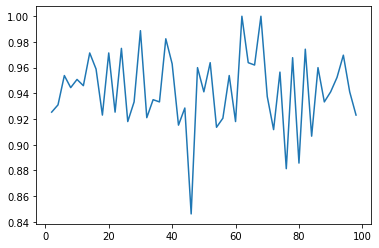

In [ ]:
X = np.array (df2.drop (['class'],1) )
y = np.array(df2['class'])

attrbs = ['clump_thickness_s', 'unif_cell_size_s', 'unif_cell_shape_s', 'marg_adhesion_s',
       'single_epith_cell_size_s', 'bland_chrom_s', 'norm_nucleoli_s',
       'mitoses_s']
y_attrb2 = ['class']

kvals = range(2, 100, 2)
scores = [get_scores2(k, attrbs, y_attrb2, df2) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

In [ ]:
df2.columns

Index(['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
       'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli',
       'mitoses', 'class', 'clump_thickness_s', 'unif_cell_size_s',
       'unif_cell_shape_s', 'marg_adhesion_s', 'single_epith_cell_size_s',
       'bland_chrom_s', 'norm_nucleoli_s', 'mitoses_s'],
      dtype='object')

In [ ]:
df2['class'].unique()

array([2, 4])

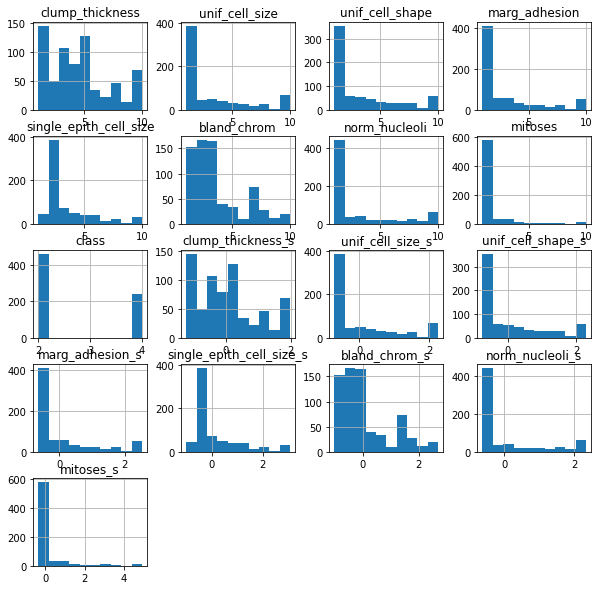

In [ ]:
df2.hist(figsize=(10,10))
plt.show()

In [ ]:
# Use random_state if you want the same values each time you run for debugging,
# but you should select the split randomly when you're ready to actually train
# and test on the data.
def monte_carlo_knn_heart(X, y, k):
  nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

  fit = nn.fit(X_train)

  patientsX = X_test
  patientsy = y_test
  # display(patients)
  # Find the k nearest neighbors
  distances, indices = fit.kneighbors(patientsX)
  #print(f'indices {indices}')
  #print(len(indices))
  #print(range(len(patientsX)))
  # Iterate over the patients
  y_pred = []
  for i in range(len(patientsX)):
    nbrs = df2.iloc[indices[i]]

    # display(nbrs)

    healthy = len(nbrs[nbrs['class']==2])
    sick = len(nbrs[nbrs['class']==4])
    # print(f'healthy: {healthy}, sick: {sick}')
    predict = 2 if healthy > sick else 4
    y_pred.append(predict)
    # actual = patienty
    # success = predict == actual
    # success
    # display(success)

  # print(y_pred)
  # print(patientsy)

  # precision = tp/(tp+fp) ("messiness")
  # recall = tp/(tp+fn)
  # support - how many samples are positive
  (p,r,f,s) = precision_recall_fscore_support(patientsy, y_pred, labels=[4])
  print(f'precision={p}, recall={r}, f-score={f}, support={s}')
  return (p,r,f,s) 
# Build the model with the training data and test with the test data

# You may also want to use this function to compute the f score. The labels parameter indicates
# that label 1 is "positive" in the sense of "true positive", "false positive" etc.
# (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[1])

precision=[0.20754717], recall=[0.19642857], f-score=[0.20183486], support=[56]
precision=[0.53846154], recall=[0.328125], f-score=[0.40776699], support=[64]
precision=[0.30882353], recall=[0.33870968], f-score=[0.32307692], support=[62]
precision=[0.2], recall=[0.14814815], f-score=[0.17021277], support=[54]
precision=[0.44117647], recall=[0.21428571], f-score=[0.28846154], support=[70]
precision=[0.27272727], recall=[0.29032258], f-score=[0.28125], support=[62]
precision=[0.23636364], recall=[0.26], f-score=[0.24761905], support=[50]
precision=[0.2625], recall=[0.328125], f-score=[0.29166667], support=[64]
precision=[0.26666667], recall=[0.25806452], f-score=[0.26229508], support=[62]
precision=[0.54411765], recall=[0.60655738], f-score=[0.57364341], support=[61]
The mean is 0.3047827287278132


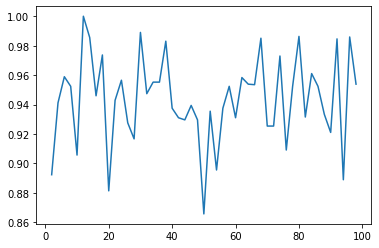

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['clump_thickness_s', 'unif_cell_size_s', 'unif_cell_shape_s', 'marg_adhesion_s',
       'single_epith_cell_size_s', 'bland_chrom_s', 'norm_nucleoli_s',
       'mitoses_s']
y_attrb = ['class']

scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

#   #Displaying the best score and the k-value
# print(f'Score :{best_score}, k: {k}')

heartscorelist1 = list()
heartfscores1 = []
X = df2[['clump_thickness_s', 'unif_cell_size_s', 'unif_cell_shape_s', 'marg_adhesion_s',
       'single_epith_cell_size_s', 'bland_chrom_s', 'norm_nucleoli_s',
       'mitoses_s']].values
y = df2[['class']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
  heartscorelist1.append((p,r,f,s))
  heartfscores1.append(f[0]) 

print(f'The mean is {mean(heartfscores1)}')

### Variable selection

precision=[0.25714286], recall=[0.16363636], f-score=[0.2], support=[55]
precision=[0.23809524], recall=[0.09615385], f-score=[0.1369863], support=[52]
precision=[0.13513514], recall=[0.07246377], f-score=[0.09433962], support=[69]
precision=[0.04761905], recall=[0.01694915], f-score=[0.025], support=[59]
precision=[0.34615385], recall=[0.13432836], f-score=[0.19354839], support=[67]
precision=[0.33333333], recall=[0.11290323], f-score=[0.1686747], support=[62]
precision=[0.15625], recall=[0.078125], f-score=[0.10416667], support=[64]
precision=[0.], recall=[0.], f-score=[0.], support=[71]
precision=[0.125], recall=[0.08333333], f-score=[0.1], support=[60]
precision=[0.25], recall=[0.06349206], f-score=[0.10126582], support=[63]
The mean is 0.11239814993548042


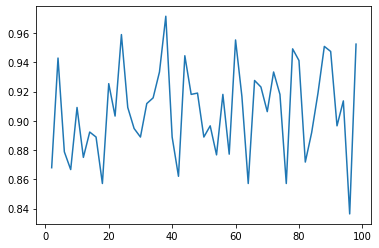

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['clump_thickness_s', 'unif_cell_size_s', 'norm_nucleoli_s', 'mitoses_s']
y_attrb = ['class']

scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
# print(f'Score :{best_score}, k: {k}')

heartscorelist2 = list()
heartfscores2 = []
X = df2[['clump_thickness_s', 'unif_cell_size_s', 'norm_nucleoli_s', 'mitoses_s']].values
y = df2[['class']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
  heartscorelist2.append((p,r,f,s))
  heartfscores2.append(f[0]) 

print(f'The mean is {mean(heartfscores2)}')

Variable Selection(Attempt 3)

precision=[0.22033898], recall=[0.1884058], f-score=[0.203125], support=[69]
precision=[0.16176471], recall=[0.16666667], f-score=[0.1641791], support=[66]
precision=[0.15625], recall=[0.24193548], f-score=[0.18987342], support=[62]
precision=[0.18604651], recall=[0.14035088], f-score=[0.16], support=[57]
precision=[0.21621622], recall=[0.13333333], f-score=[0.16494845], support=[60]
precision=[0.30434783], recall=[0.12727273], f-score=[0.17948718], support=[55]
precision=[0.52727273], recall=[0.42028986], f-score=[0.46774194], support=[69]
precision=[0.1969697], recall=[0.23214286], f-score=[0.21311475], support=[56]
precision=[0.69230769], recall=[0.14754098], f-score=[0.24324324], support=[61]
precision=[0.3030303], recall=[0.32786885], f-score=[0.31496063], support=[61]
The mean is 0.23006737180412926


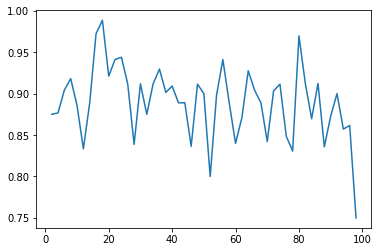

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['clump_thickness_s', 'unif_cell_size_s', 'mitoses_s']
y_attrb = ['class']

scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

#   #Displaying the best score and the k-value
# print(f'Score :{best_score}, k: {k}')

heartscorelist3 = list()
heartfscores3 = []
X = df2[['clump_thickness_s', 'unif_cell_size_s', 'mitoses_s']].values
y = df2[['class']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
  heartscorelist3.append((p,r,f,s))
  heartfscores3.append(f[0]) 

print(f'The mean is {mean(heartfscores3)}')

F value dropped a lot, dropping 'norm_nucleoli_s' value was a mistake. 

Variable Selection (Attempt 4):

In [ ]:
# kvals = range(2, 100, 2)
# attrbs = ['clump_thickness_s', 'unif_cell_size_s', 'unif_cell_shape_s', 'marg_adhesion_s', 'norm_nucleoli_s', 'mitoses_s']
# y_attrb = ['class']

# scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# # print(scores)

# scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
# scores = list(zip(*scores))

# plt.plot(kvals, scores[2])

# best_score = 0
# i = 2
# k = 0

# for score in scores[2]:
#   if score > best_score:
#     best_score = score
#     k = i
#   i += 2

#   #Displaying the best score and the k-value
# # print(f'Score :{best_score}, k: {k}')

# heartscorelist4 = list()
# heartfscores4 = []
# X = df2[['clump_thickness_s', 'unif_cell_size_s', 'unif_cell_shape_s', 'marg_adhesion_s',
#        'single_epith_cell_size_s', 'bland_chrom_s', 'norm_nucleoli_s',
#        'mitoses_s']].values
# y = df2[['class']].values
# for i in range(10):
#   (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
#   heartscorelist4.append((p,r,f,s))
#   heartfscores4.append(f[0]) 

# print(f'The mean is {mean(heartfscores4)}')

Apparently having a lot of variables doesn't do the trick. 

Variable Selection (Part 5)

precision=[0.77777778], recall=[0.1147541], f-score=[0.2], support=[61]
precision=[0.32258065], recall=[0.15873016], f-score=[0.21276596], support=[63]
precision=[0.38461538], recall=[0.08064516], f-score=[0.13333333], support=[62]
precision=[0.52173913], recall=[0.20338983], f-score=[0.29268293], support=[59]
precision=[0.11363636], recall=[0.08474576], f-score=[0.09708738], support=[59]
precision=[0.36170213], recall=[0.28813559], f-score=[0.32075472], support=[59]
precision=[0.28571429], recall=[0.12121212], f-score=[0.17021277], support=[66]
precision=[0.52941176], recall=[0.13846154], f-score=[0.2195122], support=[65]
precision=[0.22222222], recall=[0.11320755], f-score=[0.15], support=[53]
precision=[0.44285714], recall=[0.51666667], f-score=[0.47692308], support=[60]
The mean is 0.22732723512337938


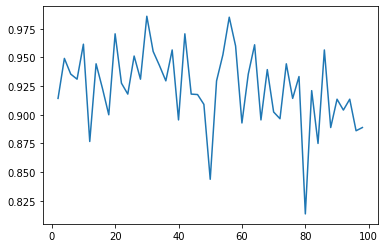

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['clump_thickness_s', 'unif_cell_size_s', 'norm_nucleoli_s', 'mitoses_s', 'single_epith_cell_size_s']
y_attrb = ['class']

scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
# print(f'Score :{best_score}, k: {k}')

heartscorelist5 = list()
heartfscores5 = []
X = df2[['clump_thickness_s', 'unif_cell_size_s', 'norm_nucleoli_s', 'mitoses_s', 'single_epith_cell_size_s']].values
y = df2[['class']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
  heartscorelist5.append((p,r,f,s))
  heartfscores5.append(f[0]) 

print(f'The mean is {mean(heartfscores5)}')

**Variable Selection Part 6 (The highest score!)**

precision=[0.95833333], recall=[0.38983051], f-score=[0.55421687], support=[59]
precision=[0.9047619], recall=[0.33928571], f-score=[0.49350649], support=[56]
precision=[0.76470588], recall=[0.39393939], f-score=[0.52], support=[66]
precision=[0.25], recall=[0.11666667], f-score=[0.15909091], support=[60]
precision=[0.10377358], recall=[0.2], f-score=[0.13664596], support=[55]
precision=[0.375], recall=[0.09375], f-score=[0.15], support=[64]
precision=[0.96428571], recall=[0.45], f-score=[0.61363636], support=[60]
precision=[0.83333333], recall=[0.30769231], f-score=[0.4494382], support=[65]
precision=[0.81818182], recall=[0.27272727], f-score=[0.40909091], support=[66]
precision=[0.10309278], recall=[0.16129032], f-score=[0.12578616], support=[62]
The mean is 0.3611411871296678


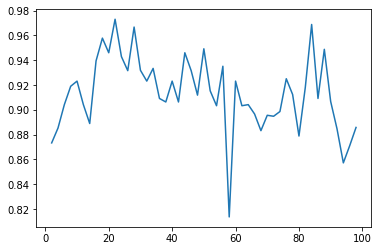

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['unif_cell_size_s', 'norm_nucleoli_s']
y_attrb = ['class']

scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
# print(f'Score :{best_score}, k: {k}')

heartscorelist6 = list()
heartfscores6 = []
X = df2[['unif_cell_size_s', 'norm_nucleoli_s']].values
y = df2[['class']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
  heartscorelist6.append((p,r,f,s))
  heartfscores6.append(f[0]) 

print(f'The mean is {mean(heartfscores6)}')

Variable Selection Part 7

In [ ]:
# kvals = range(2, 100, 2)
# attrbs = ['norm_nucleoli_s']
# y_attrb = ['class']

# scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# # print(scores)

# scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
# scores = list(zip(*scores))

# plt.plot(kvals, scores[2])

# best_score = 0
# i = 2
# k = 0

# for score in scores[2]:
#   if score > best_score:
#     best_score = score
#     k = i
#   i += 2

#   #Displaying the best score and the k-value
# # print(f'Score :{best_score}, k: {k}')

# heartscorelist7 = list()
# heartfscores7 = []
# X = df2[['norm_nucleoli_s']].values
# y = df2[['class']].values
# for i in range(10):
#   (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
#   heartscorelist7.append((p,r,f,s))
#   heartfscores7.append(f[0]) 

# print(f'The mean is {mean(heartfscores7)}')

Variable Selection Part 8

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


precision=[0.], recall=[0.], f-score=[0.], support=[68]
precision=[0.76923077], recall=[0.33898305], f-score=[0.47058824], support=[59]
precision=[0.07142857], recall=[0.109375], f-score=[0.08641975], support=[64]
precision=[0.09433962], recall=[0.17857143], f-score=[0.12345679], support=[56]
precision=[0.52941176], recall=[0.13043478], f-score=[0.20930233], support=[69]
precision=[0.375], recall=[0.10169492], f-score=[0.16], support=[59]
precision=[0.15702479], recall=[0.33333333], f-score=[0.21348315], support=[57]
precision=[0.21804511], recall=[0.46774194], f-score=[0.2974359], support=[62]
precision=[0.06306306], recall=[0.125], f-score=[0.08383234], support=[56]
precision=[0.52941176], recall=[0.13846154], f-score=[0.2195122], support=[65]
The mean is 0.18640306780399954


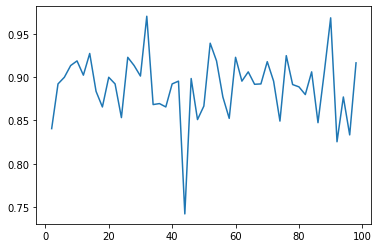

In [ ]:
kvals = range(2, 100, 2)
attrbs = ['unif_cell_size_s']
y_attrb = ['class']

scores = [get_scores2(k, attrbs, y_attrb, df2) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])

best_score = 0
i = 2
k = 0

for score in scores[2]:
  if score > best_score:
    best_score = score
    k = i
  i += 2

  #Displaying the best score and the k-value
# print(f'Score :{best_score}, k: {k}')

heartscorelist8 = list()
heartfscores8 = []
X = df2[['unif_cell_size_s']].values
y = df2[['class']].values
for i in range(10):
  (p,r,f,s) = monte_carlo_knn_heart(X, y, k)
  heartscorelist8.append((p,r,f,s))
  heartfscores8.append(f[0]) 

print(f'The mean is {mean(heartfscores8)}')

In [ ]:
df2

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class,clump_thickness_s,unif_cell_size_s,unif_cell_shape_s,marg_adhesion_s,single_epith_cell_size_s,bland_chrom_s,norm_nucleoli_s,mitoses_s
0,5,4,4,5,7,10,3,2,1,2,0.206942,0.282537,0.265534,0.766835,1.707241,-0.179666,-0.284657,-0.343941
1,3,1,1,1,2,2,3,1,1,2,-0.502864,-0.700240,-0.743593,-0.633428,-0.549680,-0.179666,-0.611989,-0.343941
2,6,8,8,1,3,4,3,7,1,2,0.561845,1.592906,1.611037,-0.633428,-0.098296,-0.179666,1.352002,-0.343941
3,4,1,1,3,2,1,3,1,1,2,-0.147961,-0.700240,-0.743593,0.066703,-0.549680,-0.179666,-0.611989,-0.343941
4,8,10,10,8,7,10,9,7,1,4,1.271650,2.248090,2.283788,1.817032,1.707241,2.279293,1.352002,-0.343941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693,3,1,1,1,3,2,1,1,1,2,-0.502864,-0.700240,-0.743593,-0.633428,-0.098296,-0.999319,-0.611989,-0.343941
694,2,1,1,1,2,1,1,1,1,2,-0.857766,-0.700240,-0.743593,-0.633428,-0.549680,-0.999319,-0.611989,-0.343941
695,5,10,10,3,7,3,8,10,2,4,0.206942,2.248090,2.283788,0.066703,1.707241,1.869467,2.333998,0.238755
696,4,8,6,4,3,4,10,6,1,4,-0.147961,1.592906,0.938286,0.416769,-0.098296,2.689120,1.024670,-0.343941
